In [2]:
library(DESeq2)
#library("pheatmap")
library("RColorBrewer")
library(ggplot2)

In [3]:
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
Attaching package: ‘dplyr’

The following object is masked from ‘package:matrixStats’:

    count

The following object is masked from ‘package:Biobase’:

    combine

The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union

The following object is masked from ‘package:GenomeInfoDb’:

    intersect

The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union

The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union

The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
counts <- read.table("~/relB/counts/merged.counts", header=TRUE, row.names=1)

In [5]:
geneType <- read.table("~/relB/genetype.txt", header=TRUE, row.names=1)

In [6]:
colData <- read.table("~/relB/counts/colData", header=TRUE)
colData$cond <- as.factor(colData$cond)
colData$stress <- as.factor(colData$stress)
colData2 <- read.table("~/relB/counts/colData2", header=TRUE)
colData2$cond <- as.factor(colData2$cond)

In [6]:
ddsMat <- DESeqDataSetFromMatrix(countData = counts, colData = colData, design = ~ stress + cond)

In [10]:
ddsMat <- DESeqDataSetFromMatrix(countData = counts, colData = colData, design = ~ cond)

In [8]:
countsWObad <- counts[,-c(2,6)]

In [9]:
ddsMat2 <- DESeqDataSetFromMatrix(countData = countsWObad, colData = colData2, design = ~ cond)

In [11]:
rld <- rlog(ddsMat, blind=FALSE)

In [10]:
rld2 <- rlog(ddsMat2, blind=FALSE)

In [11]:
sampleDists <- dist(t(assay(rld)))

In [12]:
sampleDists

         C1_1     C1_2     C1_3     C1_4     C2_1     C2_2
C1_2 53.51202                                             
C1_3 24.33432 52.47259                                    
C1_4 28.01272 54.33277 30.03042                           
C2_1 45.48104 48.29472 44.68035 42.57795                  
C2_2 35.87366 59.10540 35.12288 34.68814 37.45556         
C2_3 46.52088 50.77298 46.29105 42.22184 26.59904 38.56540

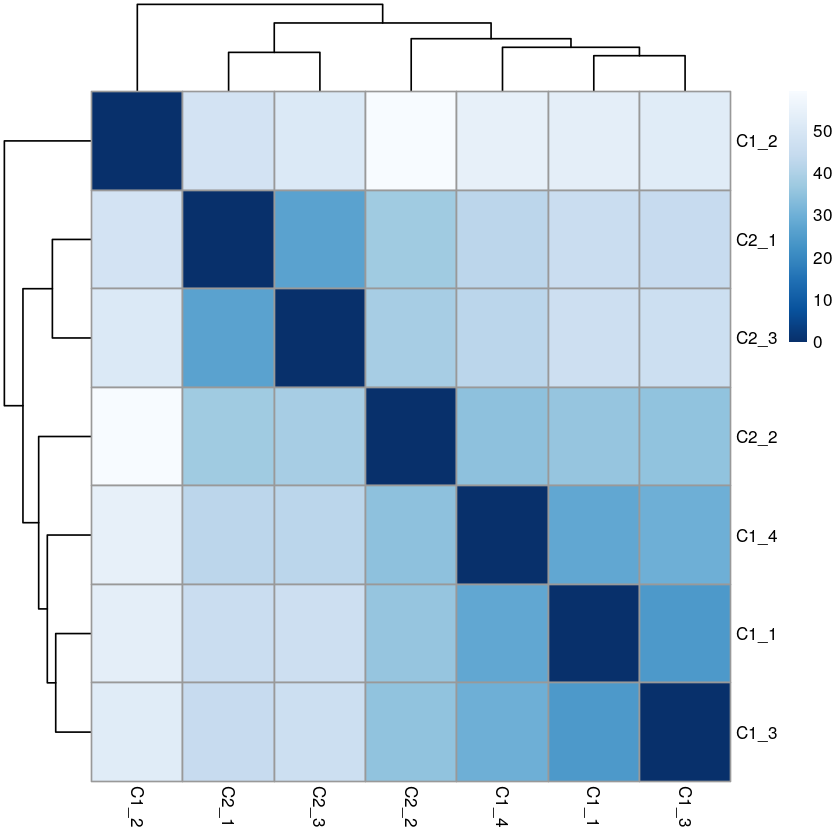

In [13]:
sampleDistMatrix <- as.matrix( sampleDists )
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors)

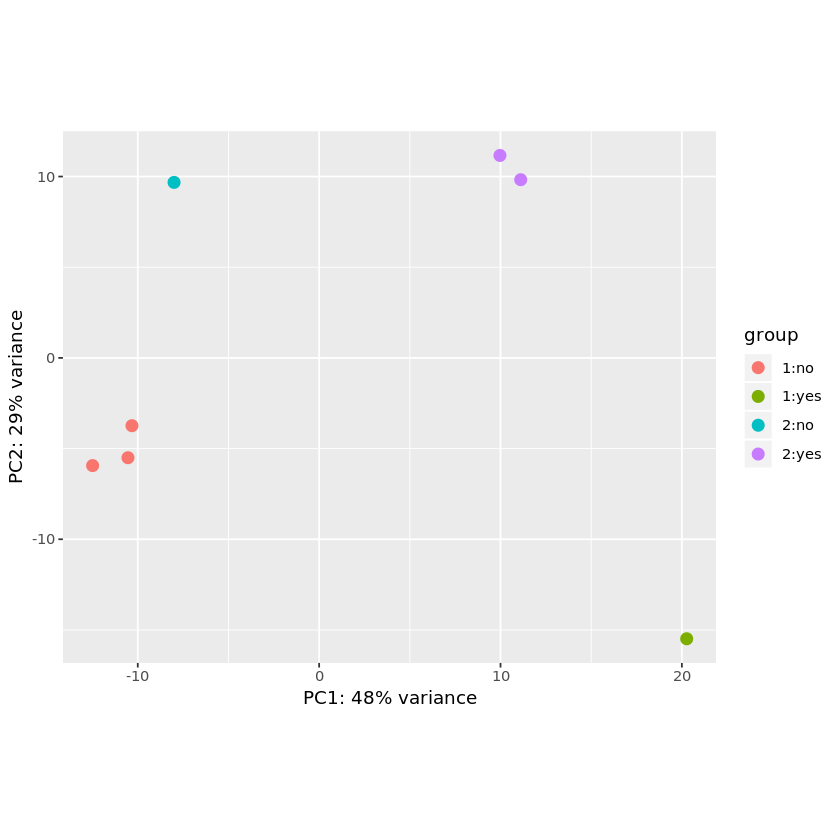

In [12]:
plotPCA(rld, intgroup=c("cond","stress"))

In [13]:
keep <- rowSums(counts(ddsMat)) >=10

In [14]:
ddsMat <- ddsMat[keep,]

In [15]:
dds <- DESeq(ddsMat)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [34]:
write.csv(merge(counts(dds, normalized=T), geneName, by.x=0, by.y=0), '~/relB/counts_normalized_2021.csv')

In [18]:
design(ddsMat) <- formula(~ cond + stress)
ddsStress <- DESeq(ddsMat)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [16]:
res <- results(dds)
#resStress <- results(ddsStress)

In [17]:
resOrdered <- res[order(res$pvalue),]

In [18]:
summary(res)


out of 21460 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 338, 1.6%
LFC < 0 (down)     : 392, 1.8%
outliers [1]       : 84, 0.39%
low counts [2]     : 6657, 31%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [22]:
summary(resStress)


out of 21460 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 751, 3.5% 
LFC < 0 (down)   : 511, 2.4% 
outliers [1]     : 1, 0.0047% 
low counts [2]   : 8321, 39% 
(mean count < 8)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [19]:
res05 <- results(dds, alpha=0.05)

In [20]:
summary(res05)


out of 21460 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 233, 1.1%
LFC < 0 (down)     : 295, 1.4%
outliers [1]       : 84, 0.39%
low counts [2]     : 6657, 31%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



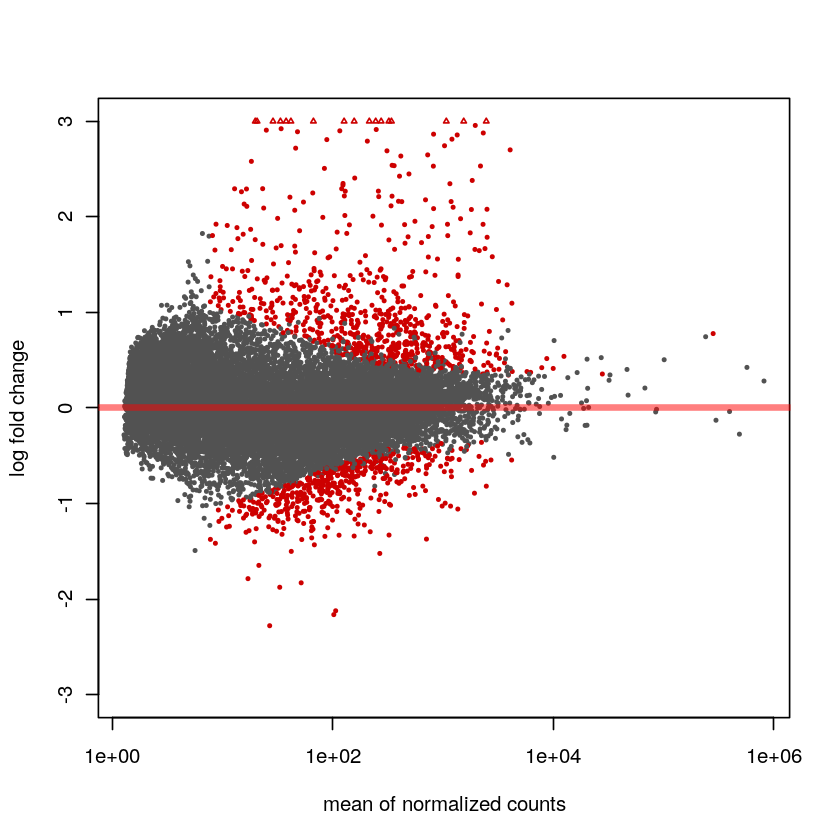

In [25]:
plotMA(resStress, ylim=c(-3,3))

In [26]:
write.csv(res, "~/relB/de.csv")

In [21]:
write.csv(res, "~/relB/de_all_21.csv")

In [22]:
resDF <- as.data.frame(res)

In [28]:
resSDF <- as.data.frame(resStress)

In [29]:
resSO <- resSDF[order(resSDF$padj),]

In [23]:
geneName <- dplyr::select(geneType, name)

In [32]:
resSOName <- merge(resSO, geneName, by.x=0, by.y=0)

In [41]:
resStressOrdered <- resSOName[order(resSOName$padj),]

In [24]:
resDF$geneid <- rownames(resDF)

In [35]:
print(dplyr::select(dplyr::filter(resDF, padj<0.05, log2FoldChange<0), geneid))

                geneid
1   ENSMUSG00000000266
2   ENSMUSG00000000531
3   ENSMUSG00000000731
4   ENSMUSG00000000732
5   ENSMUSG00000000787
6   ENSMUSG00000001128
7   ENSMUSG00000001542
8   ENSMUSG00000001630
9   ENSMUSG00000001700
10  ENSMUSG00000001794
11  ENSMUSG00000001833
12  ENSMUSG00000001918
13  ENSMUSG00000002058
14  ENSMUSG00000002881
15  ENSMUSG00000002944
16  ENSMUSG00000002985
17  ENSMUSG00000003153
18  ENSMUSG00000003200
19  ENSMUSG00000003226
20  ENSMUSG00000003228
21  ENSMUSG00000003380
22  ENSMUSG00000003429
23  ENSMUSG00000003746
24  ENSMUSG00000004110
25  ENSMUSG00000004568
26  ENSMUSG00000004936
27  ENSMUSG00000005125
28  ENSMUSG00000005148
29  ENSMUSG00000005362
30  ENSMUSG00000005465
31  ENSMUSG00000006360
32  ENSMUSG00000006948
33  ENSMUSG00000007033
34  ENSMUSG00000007038
35  ENSMUSG00000008348
36  ENSMUSG00000010122
37  ENSMUSG00000013698
38  ENSMUSG00000016319
39  ENSMUSG00000016496
40  ENSMUSG00000016664
41  ENSMUSG00000016933
42  ENSMUSG00000017677
43  ENSMUSG

In [25]:
resNames <- merge(resDF, geneName, by.x=0, by.y=0)

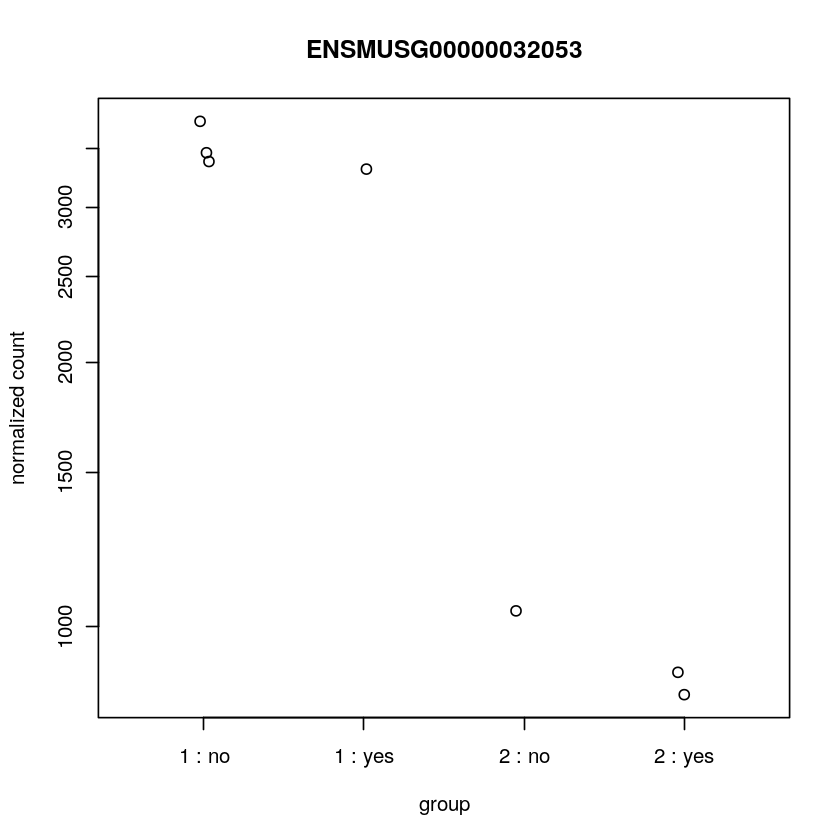

In [38]:
plotCounts(dds, gene="ENSMUSG00000032053", intgroup=c("cond","stress"))

In [26]:
resOrdered <- resNames[order(resNames$padj),]

In [27]:
write.csv(resOrdered, "~/relB/resOrdered_2021.csv")

In [44]:
write.csv(resStressOrdered, "~/relB/resStress.csv")